# Group Assignment

### Group Members: $\textit{Li Qingru, Li Sijia, Yu Qing, Zhang Honglie}$

In [1]:
# Import several useful python modules

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# connect to the SLQite Database file

database = "../File /database.sqlite"
cnx = sqlite3.connect(database)
print("Connection Successful",cnx)

Connection Successful <sqlite3.Connection object at 0x14e0d8e50>


In [3]:
# Extract the data from sqlite file and convert it to the dataframe in pandas

df_player = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx) # Convert the Player_Attribute Table
df_team   = pd.read_sql_query("SELECT * FROM Team_Attributes",cnx) # Convert the Team_Attribute Table

# Analysis the teams

In [4]:
print(df_team.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [5]:
#Missing values processing

team_dribbling_mean = df_team.groupby('team_api_id')['buildUpPlayDribbling'].mean().to_dict()
df_team['buildUpPlayDribbling'] = df_team.apply(
    lambda row: team_dribbling_mean[row['team_api_id']] if pd.isna(row['buildUpPlayDribbling']) else row['buildUpPlayDribbling'],
    axis=1
)

In [6]:
#If it still has missing data, impute with median

median_buildUpPlayDribbling = df_team['buildUpPlayDribbling'].median()
df_team['buildUpPlayDribbling'].fillna(median_buildUpPlayDribbling, inplace=True)

In [7]:
#Data Conversion: Converts date fields to datetime types and extracts the year and month

df_team['date'] = pd.to_datetime(df_team['date'])
df_team['year'] = df_team['date'].dt.year
df_team['month'] = df_team['date'].dt.month

print(df_team.describe())

                id  team_fifa_api_id    team_api_id  \
count  1458.000000       1458.000000    1458.000000   
mean    729.500000      17706.982167    9995.727023   
min       1.000000          1.000000    1601.000000   
25%     365.250000        110.000000    8457.750000   
50%     729.500000        485.000000    8674.000000   
75%    1093.750000       1900.000000    9904.000000   
max    1458.000000     112513.000000  274581.000000   
std     421.032659      39179.857739   13264.869900   

                                date  buildUpPlaySpeed  buildUpPlayDribbling  \
count                           1458       1458.000000           1458.000000   
mean   2012-12-06 22:40:59.259259392         52.462277             48.648834   
min              2010-02-22 00:00:00         20.000000             24.000000   
25%              2011-02-22 00:00:00         45.000000             42.000000   
50%              2013-09-20 00:00:00         52.000000             49.000000   
75%              2014-09

# Visualization of Teams

### General characteristics

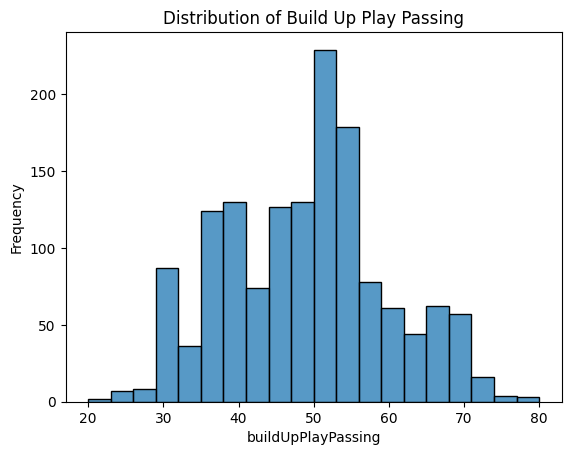

In [8]:
#Passing attributes in the team's basic strategy

sns.histplot(df_team['buildUpPlayPassing'], bins=20)
plt.xlabel('buildUpPlayPassing')
plt.ylabel('Frequency')
plt.title('Distribution of Build Up Play Passing')
plt.show()

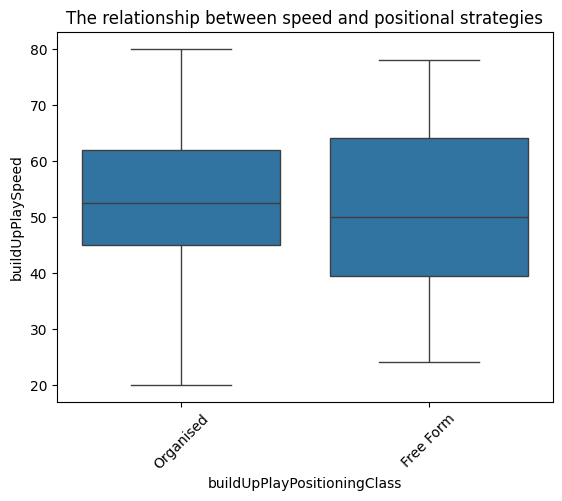

In [9]:
#The relationship between speed and positional strategies in the team's basic strategy

sns.boxplot(x='buildUpPlayPositioningClass', y='buildUpPlaySpeed', data=df_team)
plt.xlabel('buildUpPlayPositioningClass')
plt.ylabel('buildUpPlaySpeed')
plt.title('The relationship between speed and positional strategies')
plt.xticks(rotation=45)
plt.show()

### Offensive characteristics

/var/folders/pj/tl8dkvdn4y986wdc72j4yljh0000gn/T/ipykernel_82049/3126187556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_team, x='chanceCreationPassingClass', palette='viridis', ax=axes[0])
/var/folders/pj/tl8dkvdn4y986wdc72j4yljh0000gn/T/ipykernel_82049/3126187556.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_team, x='chanceCreationCrossingClass', palette='viridis', ax=axes[1])
/var/folders/pj/tl8dkvdn4y986wdc72j4yljh0000gn/T/ipykernel_82049/3126187556.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(d

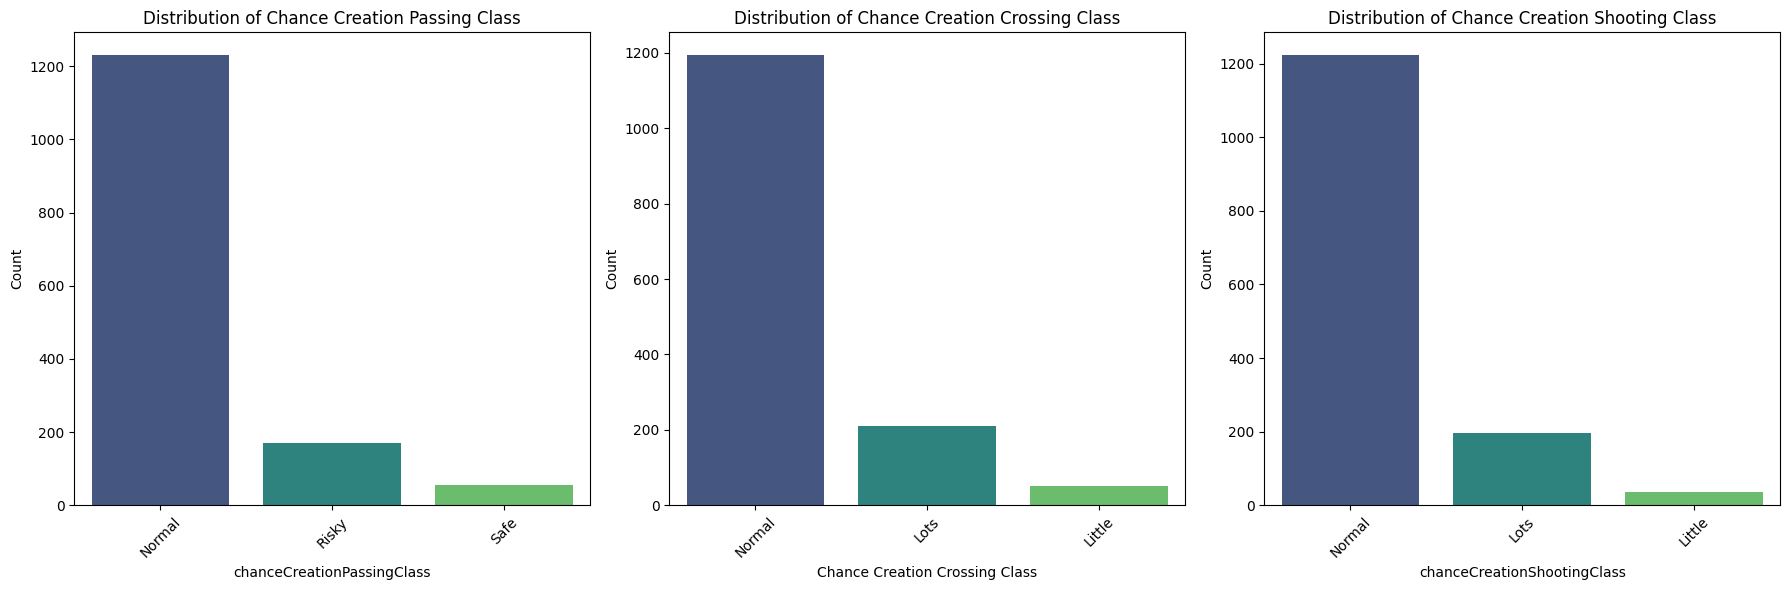

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.countplot(data=df_team, x='chanceCreationPassingClass', palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Chance Creation Passing Class')
axes[0].set_xlabel('chanceCreationPassingClass')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df_team, x='chanceCreationCrossingClass', palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of Chance Creation Crossing Class')
axes[1].set_xlabel('Chance Creation Crossing Class')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(data=df_team, x='chanceCreationShootingClass', palette='viridis', ax=axes[2])
axes[2].set_title('Distribution of Chance Creation Shooting Class')
axes[2].set_xlabel('chanceCreationShootingClass')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

### Defensive characteristics

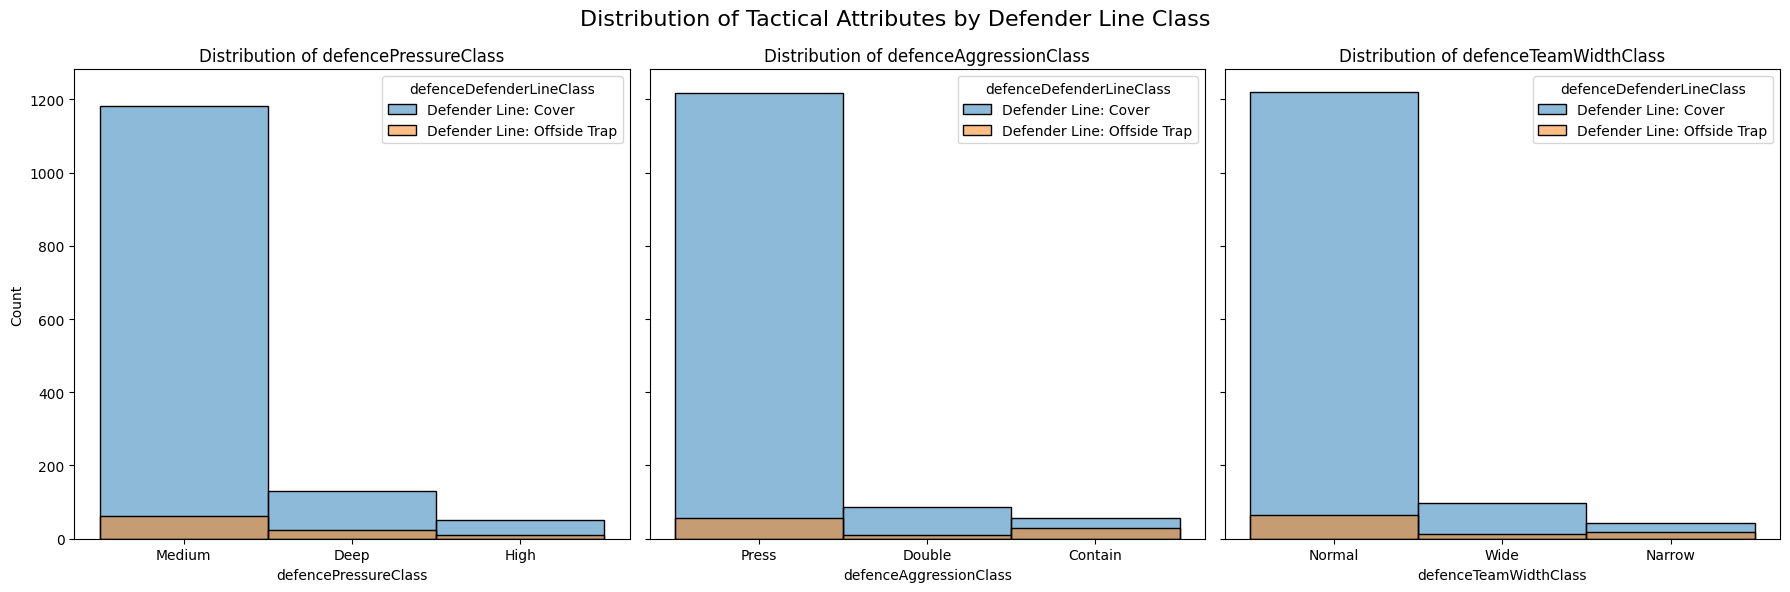

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

attributes = ['defencePressureClass', 'defenceAggressionClass', 'defenceTeamWidthClass']
for i, attribute in enumerate(attributes):
    for defender_line_class in df_team['defenceDefenderLineClass'].unique():
        subset = df_team[df_team['defenceDefenderLineClass'] == defender_line_class]
        sns.histplot(data=subset, x=attribute, ax=axes[i], label=f'Defender Line: {defender_line_class}', alpha=0.5)

    axes[i].set_title(f'Distribution of {attribute}')
    axes[i].set_xlabel(attribute)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='defenceDefenderLineClass')

fig.suptitle('Distribution of Tactical Attributes by Defender Line Class', fontsize=16)

plt.tight_layout()

plt.show()

### Overall strategy

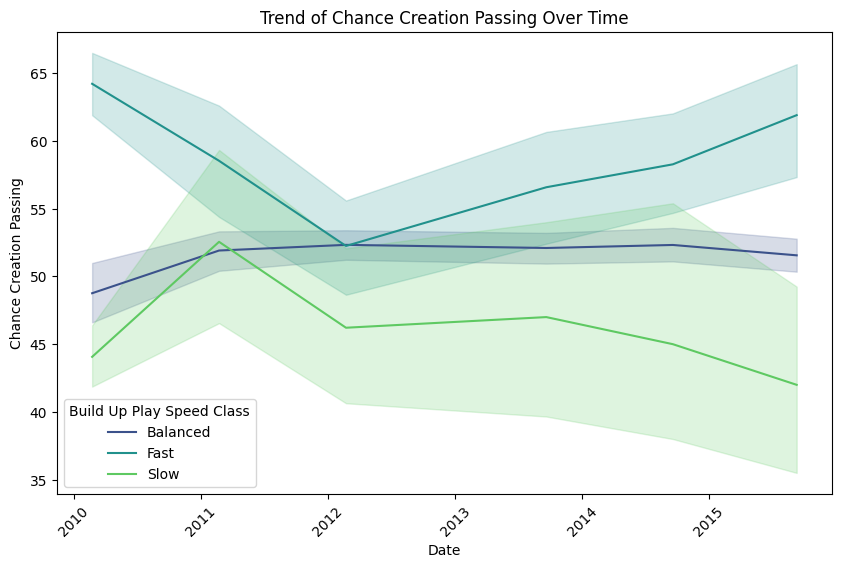

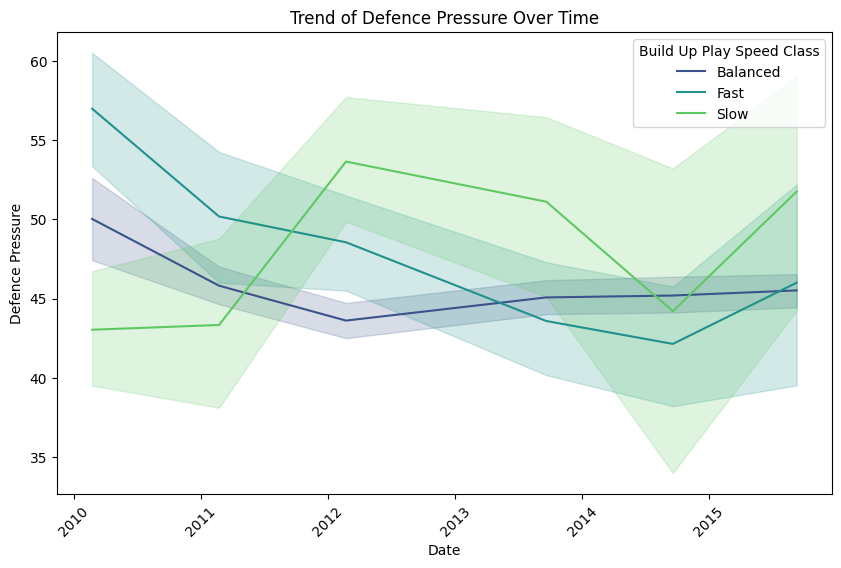

In [12]:
# Create time-trend line charts of offensive strategies

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_team, x='date', y='chanceCreationPassing', hue='buildUpPlaySpeedClass', palette='viridis')
plt.title('Trend of Chance Creation Passing Over Time')
plt.xlabel('Date')
plt.ylabel('Chance Creation Passing')
plt.legend(title='Build Up Play Speed Class')
plt.xticks(rotation=45)
plt.show()

# Create a time-trend line graph of the defense strategy
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_team, x='date', y='defencePressure', hue='buildUpPlaySpeedClass', palette='viridis')
plt.title('Trend of Defence Pressure Over Time')
plt.xlabel('Date')
plt.ylabel('Defence Pressure')
plt.legend(title='Build Up Play Speed Class')
plt.xticks(rotation=45)
plt.show()

In [13]:
#Find the ten teams with the largest time spans (older teams)

df_team['date'] = pd.to_datetime(df_team['date'])

grouped_data = df_team.groupby('team_api_id')

team_time_spans = {}

for team_id, team_data in grouped_data:
    min_date = team_data['date'].min()
    max_date = team_data['date'].max()
    time_span = max_date - min_date
    team_time_spans[team_id] = time_span

sorted_teams = sorted(team_time_spans.items(), key=lambda x: x[1], reverse=True)
top_ten_teams = sorted_teams[:10]

top_ten_team_ids = [team_id for team_id, _ in top_ten_teams]
print("Top Ten Teams with Largest Time Spans:")
for team_id in top_ten_team_ids:
    print(f'Team API ID: {team_id}')
    
team1_data = df_team[df_team['team_api_id']==top_ten_team_ids[0]]
team2_data = df_team[df_team['team_api_id']==top_ten_team_ids[1]]
team3_data = df_team[df_team['team_api_id']==top_ten_team_ids[2]]
team4_data = df_team[df_team['team_api_id']==top_ten_team_ids[3]]
team5_data = df_team[df_team['team_api_id']==top_ten_team_ids[4]]
team6_data = df_team[df_team['team_api_id']==top_ten_team_ids[5]]
team7_data = df_team[df_team['team_api_id']==top_ten_team_ids[6]]
team8_data = df_team[df_team['team_api_id']==top_ten_team_ids[7]]
team9_data = df_team[df_team['team_api_id']==top_ten_team_ids[8]]
team10_data = df_team[df_team['team_api_id']==top_ten_team_ids[9]]

Top Ten Teams with Largest Time Spans:
Team API ID: 1601
Team API ID: 1957
Team API ID: 2182
Team API ID: 2186
Team API ID: 6403
Team API ID: 7794
Team API ID: 7819
Team API ID: 7841
Team API ID: 7844
Team API ID: 7869


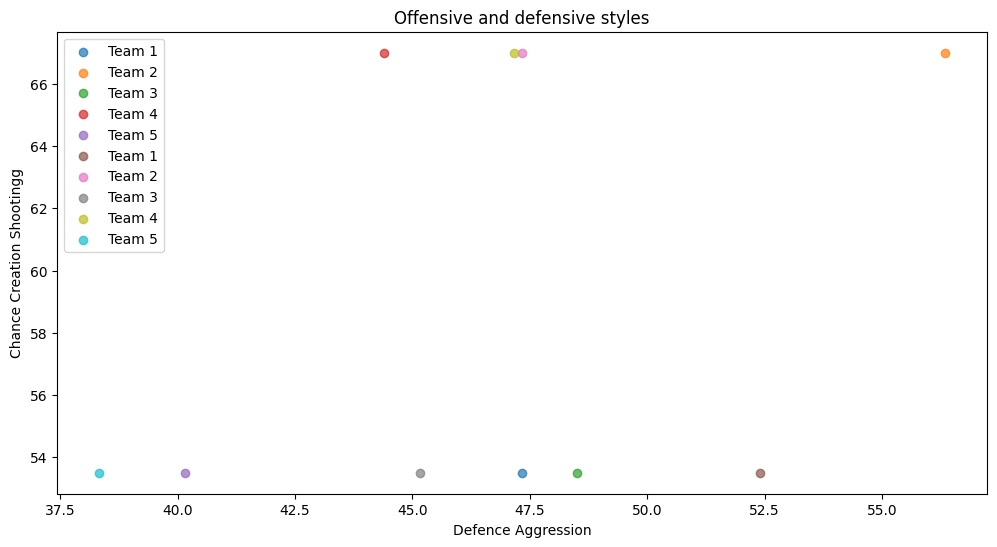

In [14]:
plt.figure(figsize=(12, 6))

plt.scatter(team1_data['defenceAggression'].mean(), team1_data['chanceCreationShooting'].mean(), label='Team 1', alpha=0.7)
plt.scatter(team2_data['defenceAggression'].mean(), team2_data['chanceCreationShooting'].mean(), label='Team 2', alpha=0.7)
plt.scatter(team3_data['defenceAggression'].mean(), team1_data['chanceCreationShooting'].mean(), label='Team 3', alpha=0.7)
plt.scatter(team4_data['defenceAggression'].mean(), team2_data['chanceCreationShooting'].mean(), label='Team 4', alpha=0.7)
plt.scatter(team5_data['defenceAggression'].mean(), team1_data['chanceCreationShooting'].mean(), label='Team 5', alpha=0.7)
plt.scatter(team6_data['defenceAggression'].mean(), team1_data['chanceCreationShooting'].mean(), label='Team 1', alpha=0.7)
plt.scatter(team7_data['defenceAggression'].mean(), team2_data['chanceCreationShooting'].mean(), label='Team 2', alpha=0.7)
plt.scatter(team8_data['defenceAggression'].mean(), team1_data['chanceCreationShooting'].mean(), label='Team 3', alpha=0.7)
plt.scatter(team9_data['defenceAggression'].mean(), team2_data['chanceCreationShooting'].mean(), label='Team 4', alpha=0.7)
plt.scatter(team10_data['defenceAggression'].mean(), team1_data['chanceCreationShooting'].mean(), label='Team 5', alpha=0.7)

plt.title('Offensive and defensive styles')
plt.xlabel('Defence Aggression')
plt.ylabel('Chance Creation Shootingg')
plt.legend()

## Modeling: dribbling ability

In [15]:
#One-Hot Encoding for categories

data = pd.get_dummies(df_team, columns=['buildUpPlaySpeedClass', 'buildUpPlayDribblingClass', 'buildUpPlayPassingClass',
                                     'buildUpPlayPositioningClass', 'chanceCreationPassingClass', 'chanceCreationCrossingClass',
                                     'chanceCreationShootingClass', 'chanceCreationPositioningClass', 'defencePressureClass',
                                     'defenceAggressionClass', 'defenceTeamWidthClass', 'defenceDefenderLineClass'])

In [16]:
X = data.drop(['buildUpPlayDribbling', 'date'], axis=1)
y = data['buildUpPlayDribbling']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

model = RandomForestRegressor(n_estimators=100, random_state=12345)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 24.13991792237443
R-squared: 0.6980586178993775


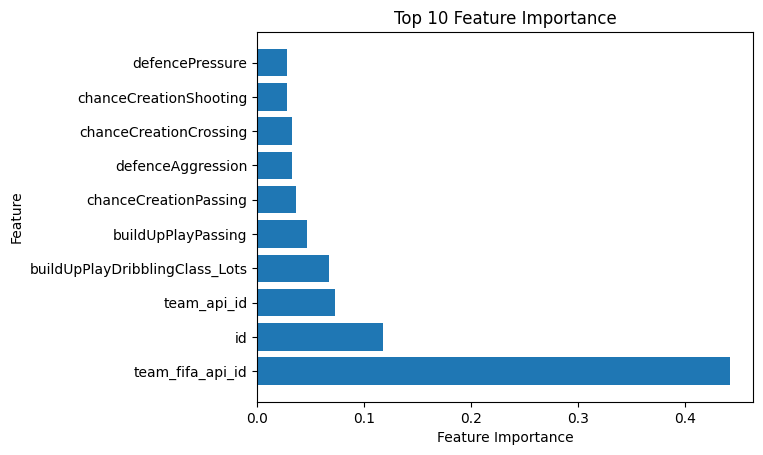

In [17]:
#analysis feature importance in the random forest model

feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()[::-1] #sort by importance

#select the top 10

top_n = 10

top_features = X.columns[sorted_idx][:top_n]
top_importance = feature_importance[sorted_idx][:top_n]

plt.barh(top_features, top_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importance'.format(top_n))
plt.show()

# Analysis the players

In [18]:
# Drop the repeated players

df_player = df_player.drop_duplicates(subset = ["player_api_id"])

Text(0.5, 1.0, 'Overall Rating: Left VS Right')

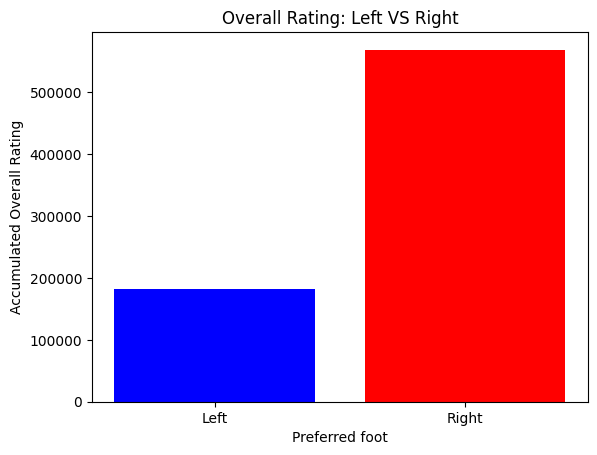

In [19]:
# Plot the accumulated overall rating 

plt.bar(['Left', 'Right'],[df_player[df_player['preferred_foot'] == 'left'].loc[:,'overall_rating'].sum(),
        df_player[df_player['preferred_foot'] == 'right'].loc[:, 'overall_rating'].sum()],color=['blue','red'])
plt.xlabel("Preferred foot")
plt.ylabel("Accumulated Overall Rating")
plt.title("Overall Rating: Left VS Right")

Text(0.5, 1.0, 'Overall Rating: Left VS Right')

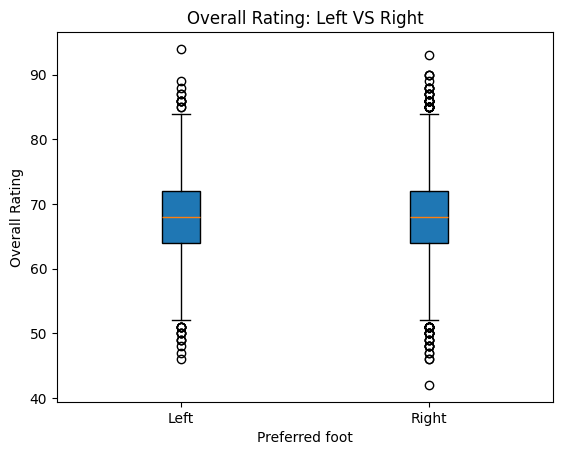

In [20]:
# Statistical analysis of overall ratings

plt.boxplot([
        df_player[df_player['preferred_foot'] == 'left']['overall_rating'],
        df_player[df_player['preferred_foot'] == 'right']['overall_rating']
],patch_artist = True, labels = ['Left','Right'])
plt.xlabel("Preferred foot")
plt.ylabel("Overall Rating")
plt.title("Overall Rating: Left VS Right")

Text(0.5, 1.0, 'crossing: Left VS Right')

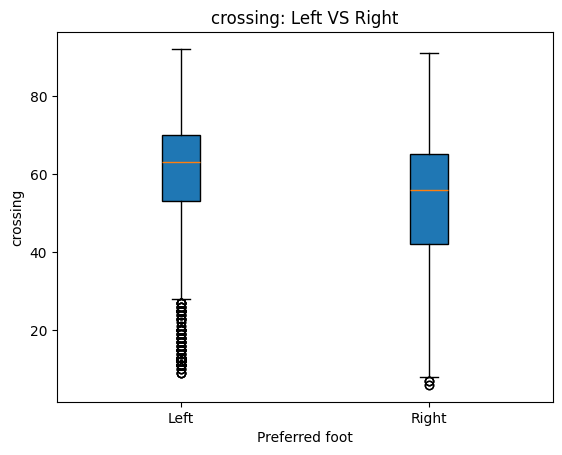

In [21]:
plt.boxplot([
        df_player[df_player['preferred_foot'] == 'left']['crossing'],
        df_player[df_player['preferred_foot'] == 'right']['crossing']
],patch_artist = True, labels = ['Left','Right'])
plt.xlabel("Preferred foot")
plt.ylabel("crossing")
plt.title("crossing: Left VS Right")

Text(0.5, 1.0, 'penalties: Left VS Right')

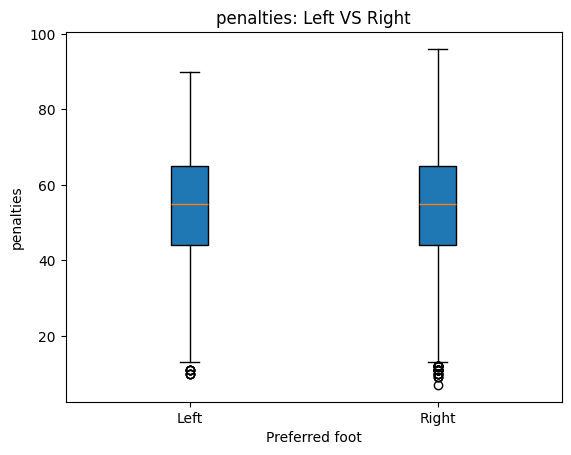

In [22]:
plt.boxplot([
        df_player[df_player['preferred_foot'] == 'left']['penalties'],
        df_player[df_player['preferred_foot'] == 'right']['penalties']
],patch_artist = True, labels = ['Left','Right'])
plt.xlabel("Preferred foot")
plt.ylabel("penalties")
plt.title("penalties: Left VS Right")

Text(0.5, 1.0, 'penalties: Left VS Right')

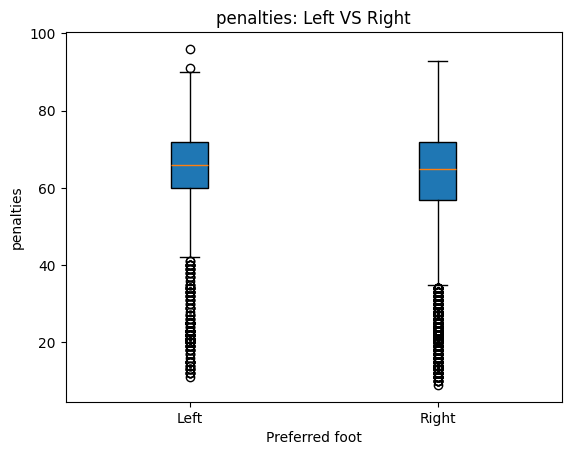

In [23]:
plt.boxplot([
        df_player[df_player['preferred_foot'] == 'left']['ball_control'],
        df_player[df_player['preferred_foot'] == 'right']['ball_control']
],patch_artist = True, labels = ['Left','Right'])
plt.xlabel("Preferred foot")
plt.ylabel("penalties")
plt.title("penalties: Left VS Right")

In [24]:
# Filter left-footed players with numeric attribute values

df_player_left = df_player[df_player['preferred_foot'] == 'left'].select_dtypes(include = 'number')

In [25]:
# Filter right-footed players with numeric attribute values

df_player_right = df_player[df_player['preferred_foot'] == 'right'].select_dtypes(include = 'number')

In [26]:
# Plot the correlation between ball_control and crossing 

corr_left = df_player_left[['crossing','ball_control']].corr()
corr_left.style.background_gradient(cmap='coolwarm')

,crossing,ball_control
crossing,1.000000,0.796706
ball_control,0.796706,1.000000


In [27]:
# Plot the correlation between ball_control and crossing

corr_right = df_player_right[['crossing','ball_control']].corr()
corr_right.style.background_gradient(cmap='coolwarm')

,crossing,ball_control
crossing,1.000000,0.834414
ball_control,0.834414,1.000000


In [28]:
# Plot the whole correlation table for left-footed players

corr_left = df_player_left.corr()
corr_left.style.background_gradient(cmap='coolwarm')

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,1.000000,-0.014507,-0.013005,-0.001975,0.009873,-0.019031,0.017691,0.017139,0.013584,0.024666,-0.013244,-0.026041,0.006506,0.008635,0.001960,-0.014937,-0.027820,-0.010105,-0.015392,-0.016392,-0.005277,-0.013418,0.004835,0.020557,0.007164,-0.011238,-0.003113,-0.008825,0.006913,0.003579,-0.009260,-0.006471,-0.012424,0.004791,0.007660,0.016476,0.011361,0.000181
player_fifa_api_id,-0.014507,1.000000,0.578007,-0.055099,0.143751,-0.015647,0.032951,-0.091035,-0.028633,-0.075828,0.133013,-0.052441,-0.111401,-0.085581,0.033158,0.339438,0.338500,0.208911,-0.109508,0.120856,-0.052403,0.037265,0.178070,-0.145134,-0.049684,-0.127239,-0.141005,0.010914,-0.097052,-0.143050,-0.065155,-0.060663,-0.028291,-0.060879,-0.101402,-0.204889,-0.105150,-0.101680
player_api_id,-0.013005,0.578007,1.000000,-0.155901,0.243768,-0.083819,-0.000011,-0.133557,-0.090418,-0.101085,0.081823,-0.113211,-0.175194,-0.160916,-0.015618,0.231534,0.231333,0.094635,-0.224833,0.093701,-0.141208,-0.082684,-0.009815,-0.240640,-0.121698,-0.204411,-0.159129,-0.024519,-0.152808,-0.137478,-0.095113,-0.088707,-0.064990,-0.046420,-0.071636,-0.121629,-0.073337,-0.072710
overall_rating,-0.001975,-0.055099,-0.155901,1.000000,0.807986,0.321337,0.298342,0.265093,0.477758,0.323707,0.335693,0.358043,0.314566,0.441513,0.442725,0.198303,0.210611,0.230832,0.772377,0.093486,0.390043,0.199573,0.233808,0.206957,0.367838,0.240537,0.176696,0.312980,0.429024,0.309164,0.096160,0.121635,0.103799,0.060694,0.047327,0.002950,0.044836,0.041092
potential,0.009873,0.143751,0.243768,0.807986,1.000000,0.241438,0.269992,0.170034,0.393510,0.252337,0.335082,0.269796,0.203631,0.313780,0.398665,0.312795,0.319264,0.272851,0.585518,0.151491,0.283434,0.135761,0.202343,0.045405,0.276517,0.111536,0.082264,0.280161,0.342959,0.243610,0.020928,0.045331,0.036602,0.021898,0.032566,0.037313,0.024301,0.022318
crossing,-0.019031,-0.015647,-0.083819,0.321337,0.241438,1.000000,0.525381,0.286998,0.769691,0.578133,0.786947,0.794103,0.687477,0.716229,0.796706,0.548855,0.523092,0.594169,0.325702,0.552921,0.616625,0.055554,0.551783,-0.124048,0.663064,0.324934,0.300120,0.681587,0.634644,0.551251,0.244425,0.291638,0.287595,-0.586856,-0.583116,-0.460254,-0.587813,-0.587915
finishing,0.017691,0.032951,-0.000011,0.298342,0.269992,0.525381,1.000000,0.199191,0.568861,0.830709,0.745054,0.656164,0.630168,0.416428,0.695578,0.442576,0.404066,0.530640,0.278786,0.405273,0.675004,-0.052543,0.245762,-0.146338,0.789960,-0.025782,-0.249659,0.805777,0.694047,0.729000,-0.349799,-0.293951,-0.318430,-0.399426,-0.387275,-0.318431,-0.391384,-0.397323
heading_accuracy,0.017139,-0.091035,-0.133557,0.265093,0.170034,0.286998,0.199191,1.000000,0.475920,0.237970,0.274409,0.229582,0.217411,0.398675,0.448194,0.004490,0.079632,-0.054229,0.232708,-0.068830,0.436660,0.218165,0.377674,0.511412,0.277300,0.593271,0.485923,0.253863,0.172376,0.315905,0.481291,0.497536,0.461388,-0.614622,-0.602538,-0.478771,-0.608411,-0.607957
short_passing,0.013584,-0.028633,-0.090418,0.477758,0.393510,0.769691,0.568861,0.475920,1.000000,0.608706,0.763046,0.725748,0.672792,0.863603,0.888264,0.411595,0.393197,0.483987,0.421338,0.451726,0.688597,0.065004,0.526535,0.035892,0.696187,0.412145,0.369935,0.663478,0.723353,0.608364,0.289059,0.352447,0.307646,-0.642821,-0.639856,-0.508717,-0.643411,-0.642977
volleys,0.024666,-0.075828,-0.101085,0.323707,0.252337,0.578133,0.830709,0.237970,0.608706,1.000000,0.722381,0.711063,0.678896,0.494868,0.700557,0.391429,0.351954,0.503614,0.332443,0.410413,0.698913,-0.031881,0.257855,-0.110022,0.800401,0.066542,-0.142964,0.77431

In [29]:
# Plot the whole correlation table for right-footed players

corr_left = df_player_right.corr()
corr_left.style.background_gradient(cmap='coolwarm')

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,1.000000,0.001322,-0.004472,0.009382,0.005346,-0.004980,-0.014544,-0.016920,-0.005340,-0.009855,-0.013783,-0.014560,-0.000360,0.000097,-0.015771,-0.000578,0.000201,-0.000017,0.008385,0.003624,-0.012406,0.001883,-0.005577,-0.014821,-0.011795,-0.005302,0.005768,-0.010816,0.005862,-0.006802,0.005099,-0.003315,0.000070,0.018058,0.012796,0.015739,0.015824,0.017480
player_fifa_api_id,0.001322,1.000000,0.576613,-0.108260,0.097515,-0.022140,0.013708,-0.047692,-0.012800,-0.054117,0.098795,-0.039669,-0.078520,-0.053285,0.026001,0.292202,0.298583,0.168493,-0.147644,0.069808,-0.042435,0.009011,0.160859,-0.115515,-0.026990,-0.114135,-0.096873,-0.010031,-0.103807,-0.117053,-0.037276,-0.033580,-0.009286,-0.065779,-0.102819,-0.172525,-0.108426,-0.091169
player_api_id,-0.004472,0.576613,1.000000,-0.218683,0.190206,-0.061416,-0.023022,-0.077011,-0.035136,-0.088722,0.068631,-0.075542,-0.132723,-0.087005,0.000402,0.205172,0.208047,0.088610,-0.260877,0.081286,-0.084025,-0.080680,0.023080,-0.198383,-0.081497,-0.154489,-0.110975,-0.033536,-0.121046,-0.106787,-0.048092,-0.043513,-0.024072,-0.071623,-0.095940,-0.136119,-0.098551,-0.092230
overall_rating,0.009382,-0.108260,-0.218683,1.000000,0.812688,0.293911,0.253250,0.236302,0.402056,0.298807,0.287893,0.320240,0.275364,0.385805,0.368041,0.170426,0.184437,0.211541,0.781728,0.101493,0.339192,0.244920,0.247132,0.237893,0.315965,0.283528,0.210476,0.276915,0.403815,0.270931,0.134415,0.166414,0.144814,0.029590,0.015513,-0.007178,0.016697,0.018467
potential,0.005346,0.097515,0.190206,0.812688,1.000000,0.247194,0.232379,0.174186,0.363652,0.248116,0.306894,0.270540,0.205061,0.330825,0.355898,0.289072,0.299928,0.265466,0.600462,0.164787,0.272169,0.184498,0.244121,0.090994,0.261474,0.166652,0.149663,0.260768,0.351297,0.224356,0.088648,0.118735,0.105415,-0.011282,-0.012240,0.003210,-0.013797,-0.008711
crossing,-0.004980,-0.022140,-0.061416,0.293911,0.247194,1.000000,0.630626,0.432894,0.811307,0.684899,0.836074,0.819047,0.735296,0.731194,0.834414,0.577763,0.558815,0.624085,0.318666,0.584418,0.696928,0.054477,0.583366,-0.123302,0.743737,0.382072,0.322605,0.732117,0.713321,0.634610,0.262453,0.316095,0.303036,-0.662174,-0.659467,-0.579217,-0.662814,-0.665619
finishing,-0.014544,0.013708,-0.023022,0.253250,0.232379,0.630626,1.000000,0.437083,0.612472,0.881224,0.802008,0.736548,0.671713,0.405865,0.745704,0.517379,0.502763,0.562425,0.295632,0.430544,0.766301,0.033713,0.402155,-0.065725,0.833866,0.130244,-0.147021,0.861261,0.674287,0.787134,-0.226931,-0.163925,-0.200081,-0.542802,-0.536862,-0.478657,-0.542152,-0.542706
heading_accuracy,-0.016920,-0.047692,-0.077011,0.236302,0.174186,0.432894,0.437083,1.000000,0.601347,0.448685,0.480959,0.392075,0.373109,0.451232,0.619621,0.197862,0.264573,0.125663,0.201105,0.089071,0.612099,0.257385,0.515423,0.446813,0.465057,0.642429,0.467593,0.468112,0.316408,0.513205,0.483356,0.507884,0.471169,-0.753561,-0.747305,-0.646422,-0.744936,-0.747604
short_passing,-0.005340,-0.012800,-0.035136,0.402056,0.363652,0.811307,0.612472,0.601347,1.000000,0.664562,0.815806,0.764290,0.723770,0.859191,0.906094,0.475001,0.465256,0.529510,0.393767,0.499532,0.754417,0.081508,0.629792,0.046269,0.751155,0.527584,0.467980,0.709027,0.764252,0.660313,0.403150,0.468963,0.432476,-0.745715,-0.743205,-0.650341,-0.744833,-0.744903
volleys,-0.009855,-0.054117,-0.088722,0.298807,0.248116,0.684899,0.881224,0.448685,0.664562,1.000000,0.803053,0.781744,0.723029,0.498026,0.771187,0.492449,0.475088,0.559858,0.336938,0.452171,0.788443,0.038233,0.422530,-0.061247,0.847724,0.207421,-0.047697,0.851

In [30]:
left_finishing = df_player_left.loc[:,'finishing'].sum()
right_finishing = df_player_right.loc[:,'finishing'].sum()
left_short_passing = df_player_left.loc[:,'short_passing'].sum()
right_short_passing = df_player_right.loc[:,'short_passing'].sum()
left_long_passing = df_player_left.loc[:,'long_passing'].sum()
right_long_passing = df_player_right.loc[:,'long_passing'].sum()
left_reactions = df_player_left.loc[:,'reactions'].sum()
right_reactions = df_player_right.loc[:,'reactions'].sum()
left_balance = df_player_left.loc[:,'balance'].sum()
right_balance = df_player_right.loc[:,'balance'].sum()

In [31]:
# Since the number of right-footed players are approximately 3 times of 
# that of left-footed players so we divide the accumulated attribute values by 3 for right-footed players

X_left = [left_finishing, left_short_passing, left_long_passing, left_reactions, left_balance]
X_right = [right_finishing / 3, right_short_passing /3, right_long_passing/3, right_reactions/3, right_balance/3]
x = np.arange(5) 
width = 0.40

Text(0.5, 1.0, 'Left VS Right')

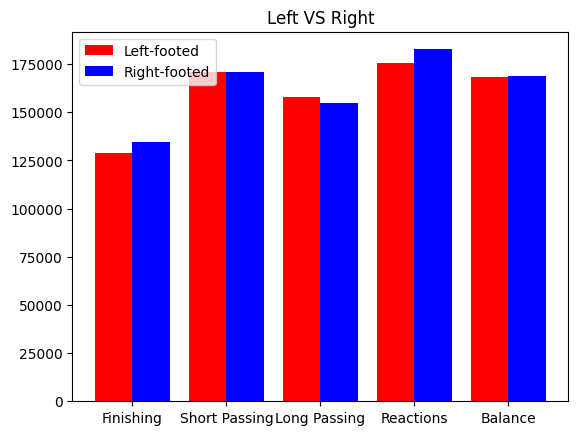

In [32]:
plt.bar(x-0.2, X_left, width, color='red') 
plt.bar(x+0.2, X_right, width,  color='blue') 
plt.xticks(x, ['Finishing', 'Short Passing', 'Long Passing', 'Reactions', 'Balance']) 
plt.legend(["Left-footed", "Right-footed"]) 
plt.title("Left VS Right")